In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [190]:
data = pd.read_excel(r'C:\Users\jishn\Desktop\rizzz\ds\Data_Train.xlsx')

In [191]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [192]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [194]:
data.shape

(10683, 11)

In [195]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [196]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [197]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [198]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [199]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [200]:
data.dropna(inplace=True)

In [201]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [202]:
def convert_duration (duration):
    if len(duration.split()) == 2 :
        hours = int(duration.split()[0][: -1])
        minutes = int(duration.split()[1][: -1])
        return hours* 60 + minutes
    else:
        return int(duration[: -1]) * 60
        

In [203]:
data['Duration']=data['Duration'].apply(convert_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [204]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data.dtypes

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\3597166813.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [205]:
data['Day']= data['Date_of_Journey'].dt.day
data['Month']= data['Date_of_Journey'].dt.month
data.drop(['Date_of_Journey'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [206]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [207]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\3322212648.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\3322212648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])


Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
Day                         int32
Month                       int32
dtype: object

In [208]:
data['DepTime_in_hours']= data['Dep_Time'].dt.hour
data['DepTime_in_mins']= data['Dep_Time'].dt.minute
data['ArrTime_in_hours']= data['Arrival_Time'].dt.hour
data['ArrTime_in_mins']= data['Arrival_Time'].dt.minute
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,ArrTime_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1 stop,No info,13302,1,3,16,50,21,35


In [209]:
data['Total_Stops']= data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})


In [210]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,ArrTime_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,No info,13302,1,3,16,50,21,35


In [211]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [212]:
data.drop('Additional_Info', axis = 1, inplace =True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,ArrTime_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,3,16,50,21,35


In [213]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

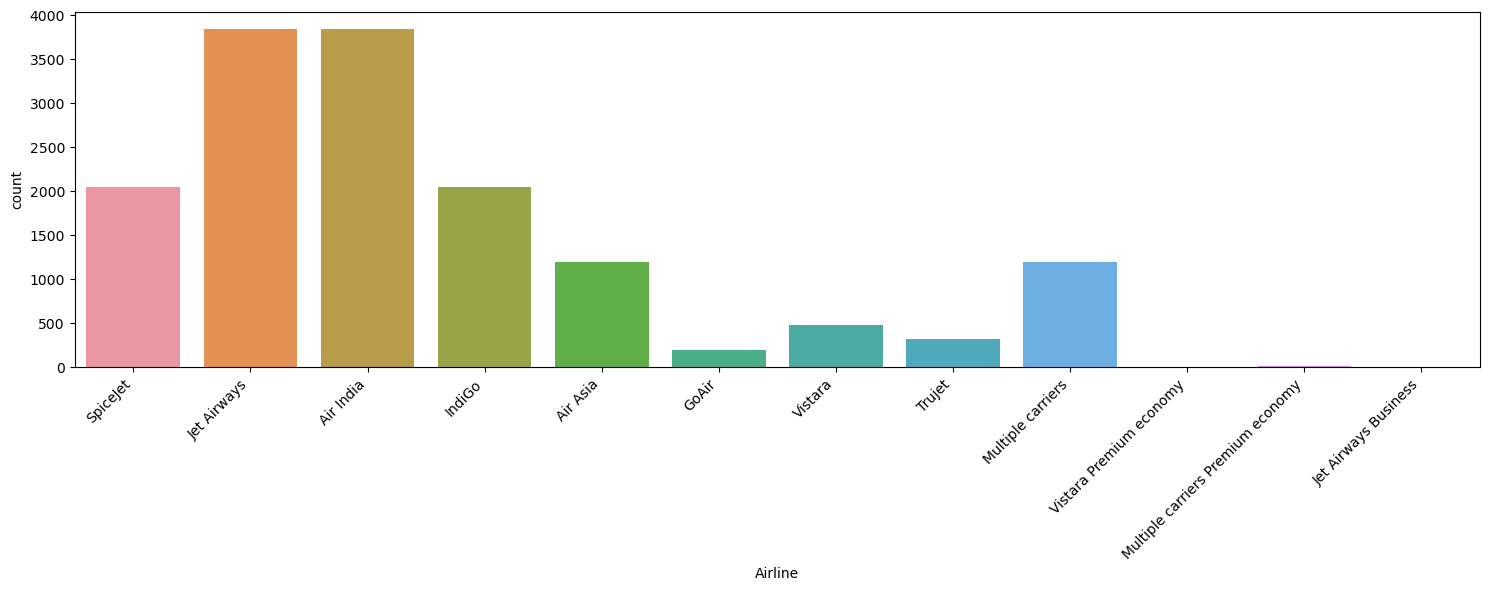

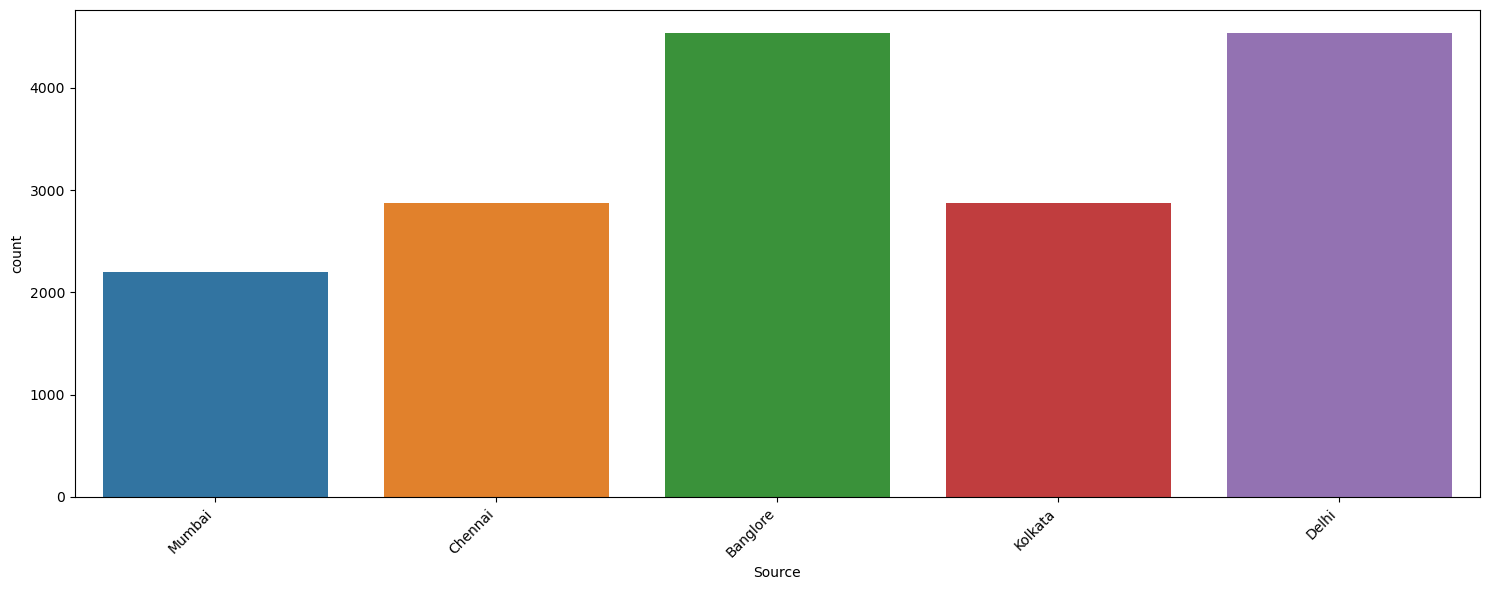

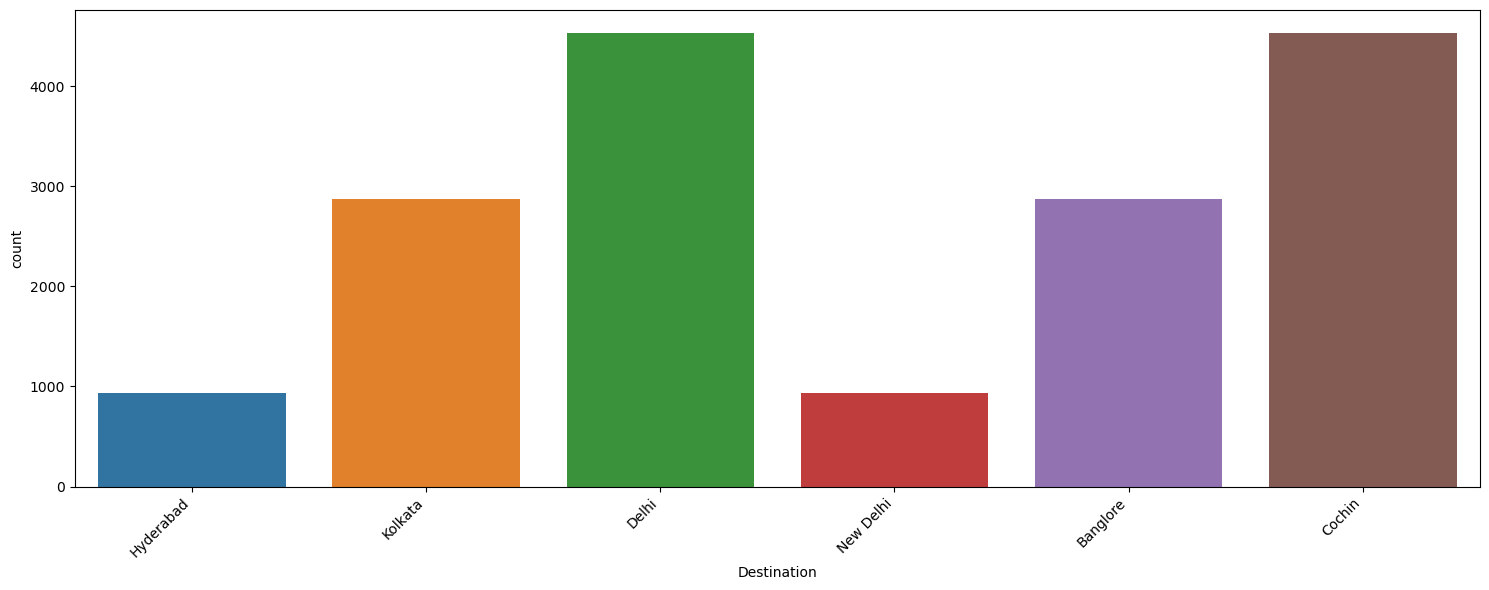

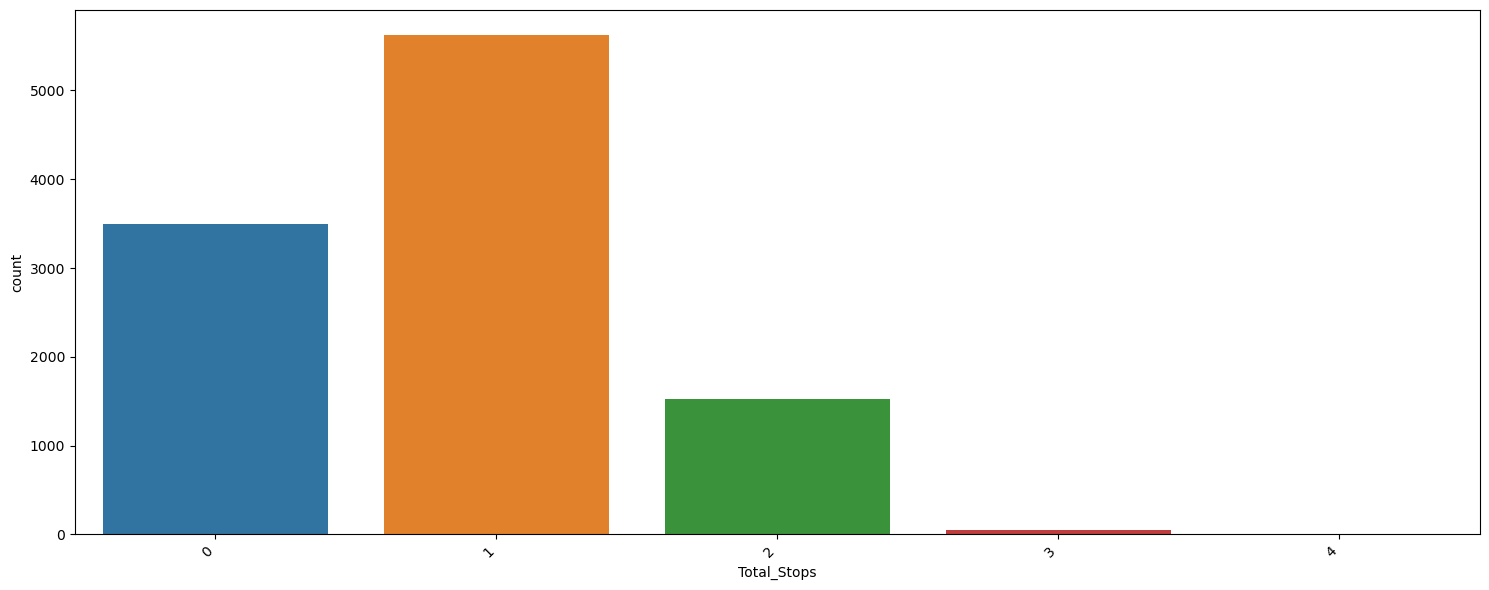

In [214]:
for i in ['Airline', 'Source','Destination','Total_Stops']:
    plt.figure(figsize=(15,6))
    sns.countplot(data=data, x=i)
    ax= sns.countplot(x=i,data=data.sort_values('Price', ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [215]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

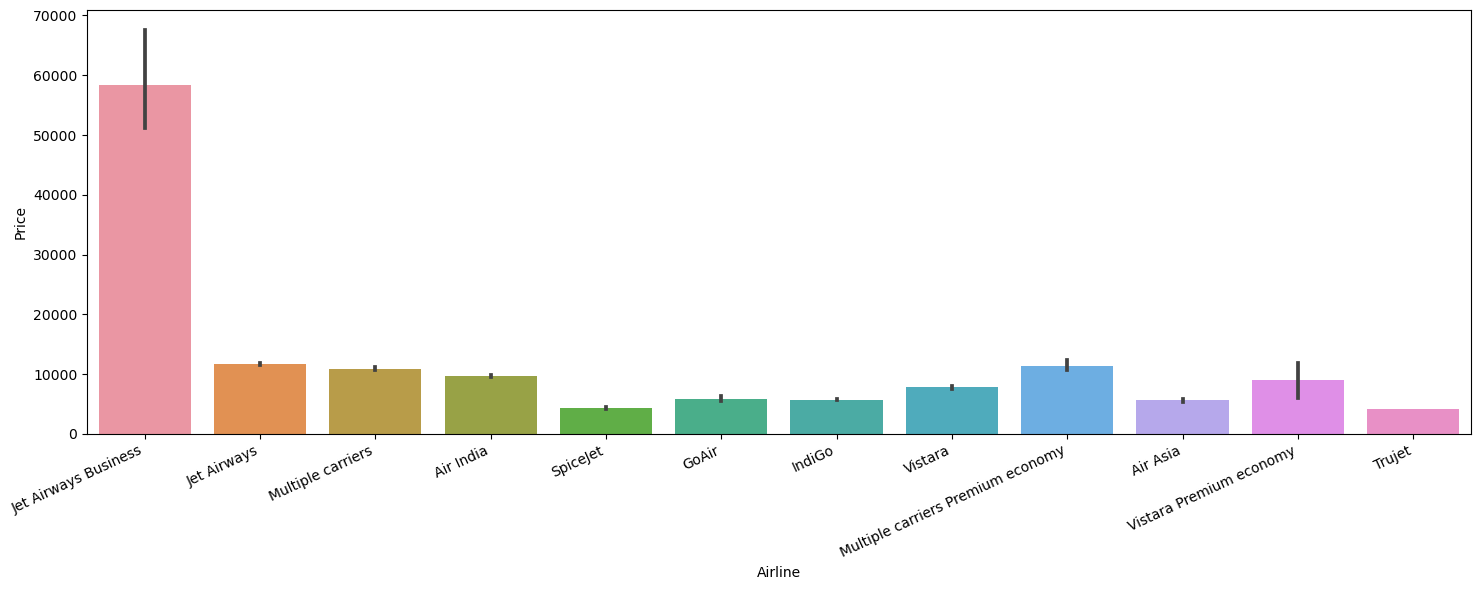

In [216]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x='Airline',y='Price', data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

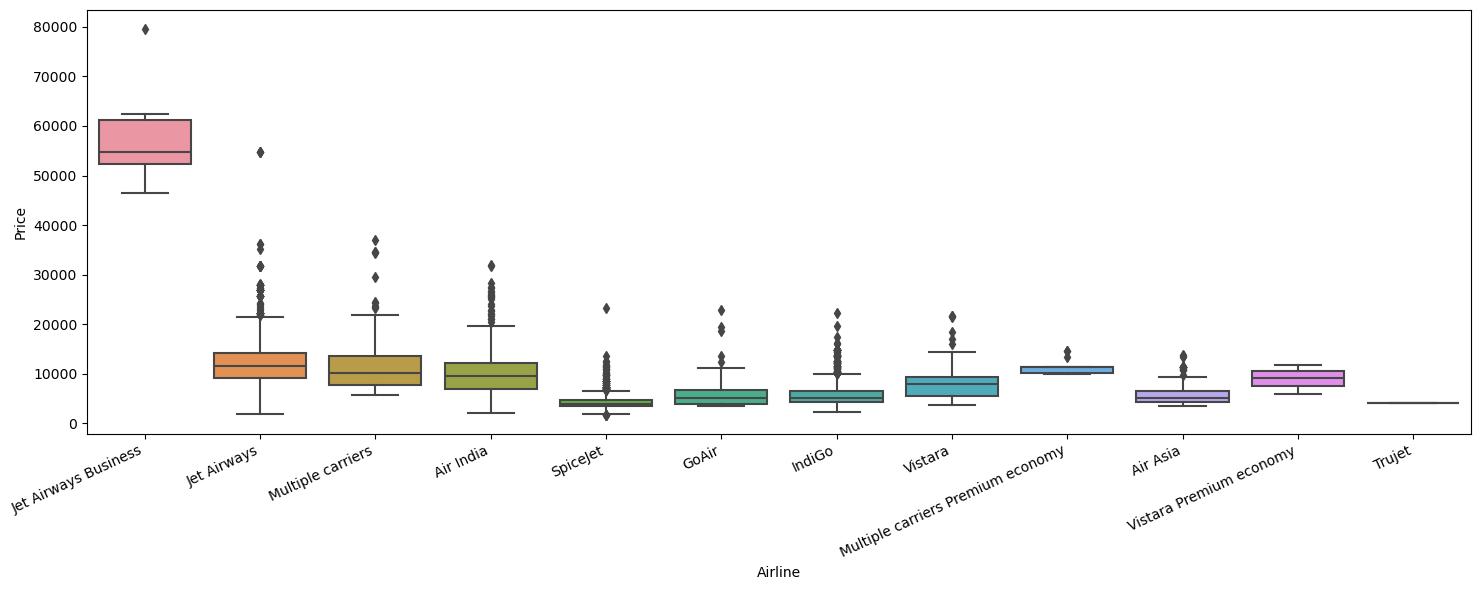

In [217]:
plt.figure(figsize=(15,6))
ax= sns.boxplot(x='Airline',y='Price', data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

In [218]:
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,min,25%,50%,75%,max,std
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,46490.0,52243.0,54747.0,61122.50,79512.0,11667.596748
Jet Airways,3849.0,11643.923357,1840.0,9134.0,11467.0,14151.00,54826.0,4258.940578
Multiple carriers Premium economy,13.0,11418.846154,9845.0,10161.0,11269.0,11269.00,14629.0,1717.153936
Multiple carriers,1196.0,10902.678094,5797.0,7723.0,10197.0,13587.00,36983.0,3721.234997
Air India,1751.0,9612.427756,2050.0,6891.0,9443.0,12219.00,31945.0,3901.734561
Vistara Premium economy,3.0,8962.333333,5969.0,7547.0,9125.0,10459.00,11793.0,2915.405518
Vistara,479.0,7796.348643,3687.0,5403.0,7980.0,9345.00,21730.0,2914.298578
GoAir,194.0,5861.056701,3398.0,3898.0,5135.0,6811.25,22794.0,2703.585767
IndiGo,2053.0,5673.682903,2227.0,4226.0,5000.0,6494.00,22153.0,2264.142168


In [219]:
Airline = pd.get_dummies(data['Airline'], drop_first=True).astype(int)
Airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [220]:
data= pd.concat([data,Airline], axis = 1)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,...,0,1,0,0,0,0,0,0,0,0


In [221]:
data.drop('Airline', axis=1, inplace=True)
data.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,3,...,0,1,0,0,0,0,0,0,0,0


In [222]:
list1 = ['Source','Destination']
for l in list1:
    print(data[[l]].value_counts(),'\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [223]:
print(data.dtypes)


Source                                       object
Destination                                  object
Route                                        object
Dep_Time                             datetime64[ns]
Arrival_Time                         datetime64[ns]
Duration                                      int64
Total_Stops                                   int64
Price                                         int64
Day                                           int32
Month                                         int32
DepTime_in_hours                              int32
DepTime_in_mins                               int32
ArrTime_in_hours                              int32
ArrTime_in_mins                               int32
Air India                                     int32
GoAir                                         int32
IndiGo                                        int32
Jet Airways                                   int32
Jet Airways Business                          int32
Multiple car

In [224]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data=data, columns=list1, drop_first=True)



# Ensure all boolean columns are converted to integer type
boolean_columns = data.select_dtypes(include='bool').columns
data[boolean_columns] = data[boolean_columns].astype(int)
data.head()


,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [225]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [226]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [227]:
route['Route_1']= route['Route'].str.split('→ ').str[0]
route['Route_2']= route['Route'].str.split('→ ').str[1]
route['Route_3']= route['Route'].str.split('→ ').str[2]
route['Route_4']= route['Route'].str.split('→ ').str[3]
route['Route_5']= route['Route'].str.split('→ ').str[4]
route.head()

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\2854949953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']= route['Route'].str.split('→ ').str[0]
C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\2854949953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']= route['Route'].str.split('→ ').str[1]
C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\2854949953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [228]:
route.fillna('None', inplace = True)
route.head()

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\2171952904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace = True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [229]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
for i in range(1,6):
    col='Route_'+ str(i)
    route[col] = le.fit_transform(route[col])

route.head()

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\450993764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\450993764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\450993764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,24,12,4
1,CCU → IXR → BBI → BLR,2,25,1,3,4
2,DEL → LKO → BOM → COK,3,32,4,5,4
3,CCU → NAG → BLR,2,34,3,12,4
4,BLR → NAG → DEL,0,34,8,12,4


In [230]:
route.drop('Route',axis=1, inplace=True)
route.head()

C:\Users\jishn\AppData\Local\Temp\ipykernel_24032\1257871378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route',axis=1, inplace=True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,24,12,4
1,2,25,1,3,4
2,3,32,4,5,4
3,2,34,3,12,4
4,0,34,8,12,4


In [231]:
data=pd.concat([data,route], axis=1)
data.head()


,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,22,20,...,0,0,0,0,1,0,13,24,12,4
1,CCU → IXR → BBI → BLR,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,5,5,50,...,0,0,0,0,0,2,25,1,3,4
2,DEL → LKO → BOM → COK,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,9,25,...,1,0,0,0,0,3,32,4,5,4
3,CCU → NAG → BLR,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,5,18,5,...,0,0,0,0,0,2,34,3,12,4
4,BLR → NAG → DEL,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,3,16,50,...,0,0,0,0,1,0,34,8,12,4


In [232]:
data.drop('Route', axis=1, inplace=True)
data.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,2024-07-10 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,22,20,1,...,0,0,0,0,1,0,13,24,12,4
1,2024-07-10 05:50:00,2024-07-10 13:15:00,445,2,7662,1,5,5,50,13,...,0,0,0,0,0,2,25,1,3,4
2,2024-07-10 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,9,25,4,...,1,0,0,0,0,3,32,4,5,4
3,2024-07-10 18:05:00,2024-07-10 23:30:00,325,1,6218,12,5,18,5,23,...,0,0,0,0,0,2,34,3,12,4
4,2024-07-10 16:50:00,2024-07-10 21:35:00,285,1,13302,1,3,16,50,21,...,0,0,0,0,1,0,34,8,12,4


In [233]:
data.drop(['Arrival_Time','Dep_Time'], axis=1, inplace=True)
data.head()

,Duration,Total_Stops,Price,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,ArrTime_in_mins,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,1,0,13,24,12,4
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,0,0,2,25,1,3,4
2,1140,2,13882,9,6,9,25,4,25,0,...,1,0,0,0,0,3,32,4,5,4
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,2,34,3,12,4
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,1,0,34,8,12,4


In [234]:
temp_col= data.columns.to_list()
print(temp_col,'\n')

new_col= temp_col[:2]+temp_col[3:]
new_col.append(temp_col[2])
print(new_col,'\n')

data=data.reindex(columns=new_col)
data.head()

['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'DepTime_in_hours', 'DepTime_in_mins', 'ArrTime_in_hours', 'ArrTime_in_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Day', 'Month', 'DepTime_in_hours', 'DepTime_in_mins', 'ArrTime_in_hours', 'ArrTime_in_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hy

,Duration,Total_Stops,Day,Month,DepTime_in_hours,DepTime_in_mins,ArrTime_in_hours,ArrTime_in_mins,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,24,3,22,20,1,10,0,0,...,0,0,0,1,0,13,24,12,4,3897
1,445,2,1,5,5,50,13,15,1,0,...,0,0,0,0,2,25,1,3,4,7662
2,1140,2,9,6,9,25,4,25,0,0,...,0,0,0,0,3,32,4,5,4,13882
3,325,1,12,5,18,5,23,30,0,0,...,0,0,0,0,2,34,3,12,4,6218
4,285,1,1,3,16,50,21,35,0,0,...,0,0,0,1,0,34,8,12,4,13302


In [235]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
data= scaler.fit_transform(data)
data[0]

array([-0.93160111, -1.22066609,  1.23728754, -1.46740227,  1.65415376,
       -0.2349499 , -1.80043628, -0.8900139 , -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.37093967,  0.40819941,  0.06250046, -1.12553455])

In [236]:
from sklearn.model_selection import train_test_split as tts

x= data[:,: -1]
y=data[:,-1]

In [237]:
x_train, x_test, y_train, y_test = tts(x,y, test_size = 0.1, random_state = 69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


In [238]:
## Linear Regression
from sklearn.linear_model import LinearRegression 
model= LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [239]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import accuracy_score
def metrics(y_true,y_pred):
    print(f'RMSE:', mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_Squared value:', r2_score(y_true,y_pred))

def accuracy(y_true, y_pred):
    errors= abs(y_true-y_pred)
    mape= 100*np.mean(errors/y_true)
    accuracy = 100- mape
    return accuracy
    
    

In [240]:
y_pred = model.predict(x_test)

In [241]:
metrics(y_test,y_pred)

RMSE: 0.5321823574168354
R_Squared value: 0.6513112662713518


In [242]:
accuracy(y_test, y_pred)

72.4611417594815

## Random Forest



In [244]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest= RandomForestRegressor(n_estimators= 500, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [245]:
pred_rf= model_random_forest.predict(x_test)

In [246]:
metrics(y_test, pred_rf)


RMSE: 0.3751453951913471
R_Squared value: 0.8267328590103588


In [247]:
accuracy(y_test,pred_rf)

96.47288390353242